# TP Clustering complets

### Prénom : Bryan
### Nom : CHEN

## Objectifs

Le  but de ces TP est mettre en oeuvre et de comparer différents algorithmes de clustering tout d’abord à partir de quelques méthodes fournies par scikitlearn ou en utilisant des méthodes externes. Le planning des séances est le suivant :

•TP1 : méthodes k-Means et k-medoids 

•TP2 : méthodes de clustering hiérarchique agglomératif et DBSCAN 

•Travail personnel : HDBSCAN et préparation du rapport 

Nous utilisons des jeux de données en 2 dimensions seulement pour des raisons pédagogiques. En effet, en visualisant ces exemples, il est souvent assez évident de déterminer le bon nombre de clusters à obtenir. 

## Environnement de travail 

Dans un premier temps vous aurez besoin des packages scipy, numpy, matplotlib, scikit-learn.

## 1. Jeux de données

Les jeux de données sont disponibles sur le site : https://github.com/deric/clustering-benchmark. 

Seuls les jeux de données "artificiels" seront considérés dans ces TP (https://github.com/deric/clustering-benchmark/tree/master/src/main/resources/datasets/artificial).


Le code ci-dessous fournit un exemple pour lire ces jeux de données et les visualiser en deux dimensions. Pour la lecture des jeux de données, il utilise le package arff de from scipy.io. Pour l’affichage, il utilise le package pyplot de matplotlib. N’hésitez pas à proposer des visualisations plus avancées.



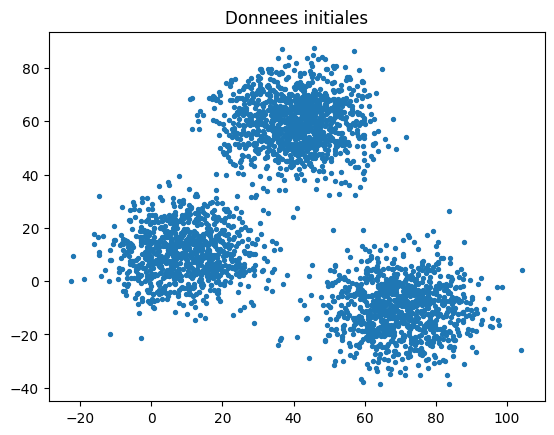

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff

# Parser un fichier de donnees au format arff
# data est un tableau d’exemples avec pour chacun
# la liste des valeurs des features
#
# Dans les jeux de donnees consideres :
# il y a 2 features (dimension 2)
# Ex : [[-0.499261 , -0.0612356],
# [-1.51369 , 0.265446],
# [-1.60321 , 0.362039], .....
# ]
#
# Note : chaque exemple du jeu de donnees contient aussi un
# numero de cluster. On retire cette information
path = "./artificial/"

databrut = arff.loadarff(open(path+"xclara.arff", "r"))
# print(databrut)
datanp = [[x[0],x[1]] for x in databrut[0]]
# print(datanp)

# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [-0.499261 , -1.51369 , -1.60321 , ...]
# Ex pour f1 = [-0.0612356 , 0.265446 , 0.362039 , ...]

# f0 tous les éléments de la première colonne de datanp
# f1 tous les éléments de la deuxième colonne de datanp
f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

plt.scatter(f0 , f1 , s=8)
plt.title("Donnees initiales")
plt.show()

Dans les jeux de données arff, pour chaque exemple, la dernière colonne fournit le numéro de cluster (sans précision sur la méthode utilisée pour l’obtenir). En pratique, vous ne devez pas utiliser cette colonne car on suppose que les clusters ne sont pas connus.

## 2. Clustering k-Means et k-Medois

### 2.1. Pour démarrer

Le code ci-dessous permet d'appeler la méthode k-Means avec un nombre fixé de clusters et d'afficher le résultat ainsi que le temps de calcul et le nombre d'itérations.

Appel KMeans pour une valeur fixee de k 


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


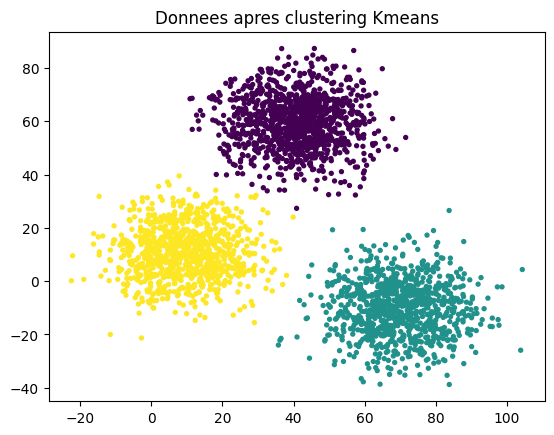

nb clusters = 3 , nb iter = 3 , runtime =  317.28 ms


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import cluster
#
# Les donnees sont dans datanp (2 dimensions)
# f0 : valeurs sur la premiere dimension
# f1 : valeur sur la deuxieme dimension
#

print("Appel KMeans pour une valeur fixee de k ")
tps1 = time.time()
k=3
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init='auto')
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.scatter(f0 , f1 , c=labels , s=8)
plt.title("Donnees apres clustering Kmeans")
plt.show()
print("nb clusters =",k,", nb iter =",iteration , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")

### 2.2. Intérêts de la méthode k-Means

Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode k-Means devrait identifier correctement les clusters.

On considère qu’il peut être possible de déterminer "automatiquement" le bon nombre de clusters.

Utilisez les métriques d’évaluation proposées dans  scikitlearn (coefficient de silhouette et/ou indice de Davies-Bouldin et/ou l'indice de Calinski-Harabasz)

- Appliquez itérativement la méthode précédente pour déterminer le bon nombre de clusters à l'aide de métriques d'évaluation
- Mesurez le temps de calcul
- Arrivez-vous à retrouver le résultat attendu à l'aide de ces métriques d'évaluation ?

Appel KMeans pour une valeur fixee de k 


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


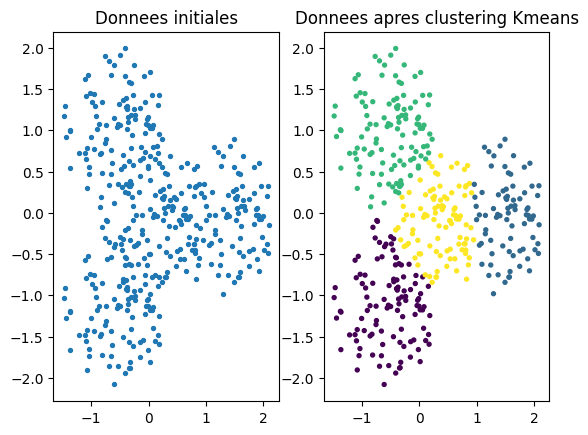

nb clusters = 4 , nb iter = 8 , runtime =  134.91 ms


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/si

Nombre de clusters = 2
Score de silhouette: 0.3636567117760847
Score de Davies-Bouldin: 1.0121555980758035
-------------------------------
Nombre de clusters = 3
Score de silhouette: 0.49747648143912815
Score de Davies-Bouldin: 0.6838206168452641
-------------------------------
Nombre de clusters = 4
Score de silhouette: 0.41941227532407427
Score de Davies-Bouldin: 0.7932572271453546
-------------------------------
Nombre de clusters = 5
Score de silhouette: 0.38499690086169935
Score de Davies-Bouldin: 0.8763436268783906
-------------------------------
Nombre de clusters = 6
Score de silhouette: 0.34968885176184306
Score de Davies-Bouldin: 1.0068917580171204
-------------------------------


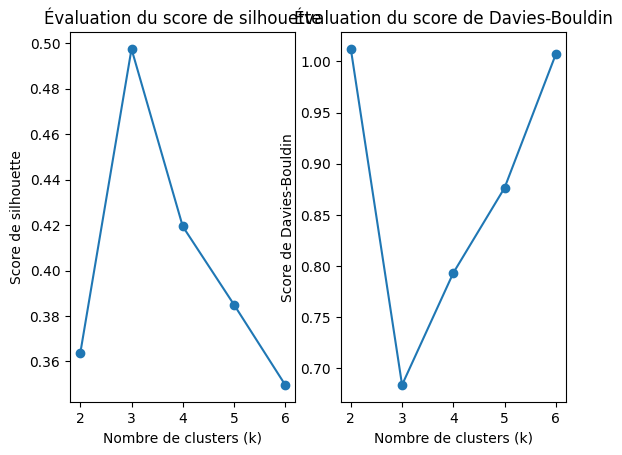

In [55]:
# Choisissez quelques jeux de données pour lesquels il vous semble que la méthode k-means devrait identifier correctement les clusters

# Premier exemple

databrut = arff.loadarff(open(path+"tetra.arff", "r"))

datanp = [[x[0],x[1]] for x in databrut[0]]

f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

plt.subplot(1,2,1)
# s = 8 for the size of the dots
plt.scatter(f0 , f1 , s=8)
plt.title("Donnees initiales")
print("Appel KMeans pour une valeur fixee de k ")
tps1 = time.time()

k=4
model = cluster.KMeans(n_clusters=k, init='k-means++')

model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.subplot(1,2,2)
plt.scatter(f0 , f1 , c=labels , s=8)
plt.title("Donnees apres clustering Kmeans")
plt.show()
# Mesurez le temps de calcul
print("nb clusters =",k,", nb iter =",iteration , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")


from sklearn import metrics

# Liste des valeurs de k à évaluer
k_values = [2, 3, 4, 5, 6]

# Initialisation des listes pour stocker les métriques d'évaluation
silhouette_scores = []
davies_bouldin_scores = []

# Boucle sur les différentes valeurs de k
for k in k_values:
    model = cluster.KMeans(n_clusters=k, init='k-means++')
    model.fit(datanp)
    labels = model.labels_
    
    silhouette = metrics.silhouette_score(datanp, labels)
    davies_bouldin = metrics.davies_bouldin_score(datanp, labels)
    
    # Ajout des métriques à la liste correspondante
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

# Affichage des métriques pour chaque valeur de k
for i, k in enumerate(k_values):
    print("Nombre de clusters =", k)
    print("Score de silhouette:", silhouette_scores[i])
    print("Score de Davies-Bouldin:", davies_bouldin_scores[i])
    print("-------------------------------")

# Tracé des métriques pour chaque valeur de k
plt.subplot(1,2,1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de silhouette")
plt.title("Évaluation du score de silhouette")

plt.subplot(1,2,2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de Davies-Bouldin")
plt.title("Évaluation du score de Davies-Bouldin")

plt.show()

# Recherchez le score de silhouette le plus élevé. Une valeur proche de 1 indique que les échantillons sont bien regroupés, 
# tandis qu'une valeur proche de -1 indique des clusters incorrects. Choisissez le k correspondant au score de silhouette le plus élevé.

# Recherchez le score de Davies-Bouldin le plus faible. Une valeur proche de zéro indique des clusters bien séparés. 
# Choisissez le k correspondant au score de Davies-Bouldin le plus bas.


# Arrivez-vous à retrouver le résultat attendu à l'aide de ces métriques d'évaluation ?

# Plus ou moins

Appel KMeans pour une valeur fixee de k 


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


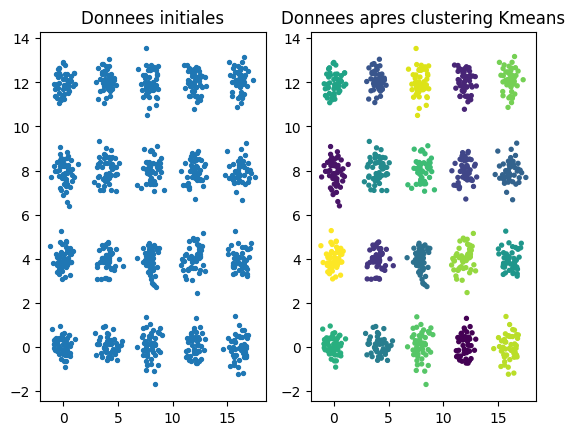

nb clusters = 20 , nb iter = 3 , runtime =  154.66 ms


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/si

Nombre de clusters = 12
Score de silhouette: 0.502550881131503
Score de Davies-Bouldin: 0.6686112396702808
-------------------------------
Nombre de clusters = 13
Score de silhouette: 0.5226375334303707
Score de Davies-Bouldin: 0.7721837870030636
-------------------------------
Nombre de clusters = 14
Score de silhouette: 0.5410293342011587
Score de Davies-Bouldin: 0.6654838099208921
-------------------------------
Nombre de clusters = 15
Score de silhouette: 0.5599321106862551
Score de Davies-Bouldin: 0.620742520545096
-------------------------------
Nombre de clusters = 16
Score de silhouette: 0.6112569383725128
Score de Davies-Bouldin: 0.5605249390381186
-------------------------------
Nombre de clusters = 17
Score de silhouette: 0.6338286028398077
Score de Davies-Bouldin: 0.5049173486997275
-------------------------------
Nombre de clusters = 18
Score de silhouette: 0.6728958152353052
Score de Davies-Bouldin: 0.44874531764832093
-------------------------------
Nombre de clusters = 

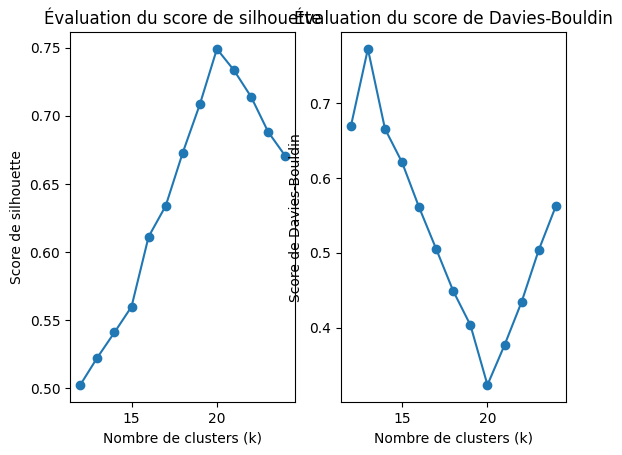

In [56]:
# Deuxième exemple

databrut = arff.loadarff(open(path+"twenty.arff", "r"))

datanp = [[x[0],x[1]] for x in databrut[0]]

f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

plt.subplot(1,2,1)
plt.scatter(f0 , f1 , s=8)
plt.title("Donnees initiales")


print("Appel KMeans pour une valeur fixee de k ")
tps1 = time.time()

k=20
model = cluster.KMeans(n_clusters=k, init='k-means++')

model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.subplot(1,2,2)
plt.scatter(f0 , f1 , c=labels , s=8)
plt.title("Donnees apres clustering Kmeans")
plt.show()
# Mesurez le temps de calcul
print("nb clusters =",k,", nb iter =",iteration , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")


from sklearn import metrics

# Liste des valeurs de k à évaluer
k_values = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

# Initialisation des listes pour stocker les métriques d'évaluation
silhouette_scores = []
davies_bouldin_scores = []

# Boucle sur les différentes valeurs de k
for k in k_values:
    model = cluster.KMeans(n_clusters=k, init='k-means++')
    model.fit(datanp)
    labels = model.labels_
    
    silhouette = metrics.silhouette_score(datanp, labels)
    davies_bouldin = metrics.davies_bouldin_score(datanp, labels)
    
    # Ajout des métriques à la liste correspondante
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

# Affichage des métriques pour chaque valeur de k
for i, k in enumerate(k_values):
    print("Nombre de clusters =", k)
    print("Score de silhouette:", silhouette_scores[i])
    print("Score de Davies-Bouldin:", davies_bouldin_scores[i])
    print("-------------------------------")

# Tracé des métriques pour chaque valeur de k
plt.subplot(1,2,1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de silhouette")
plt.title("Évaluation du score de silhouette")

plt.subplot(1,2,2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de Davies-Bouldin")
plt.title("Évaluation du score de Davies-Bouldin")

plt.show()

# Recherchez le score de silhouette le plus élevé. Une valeur proche de 1 indique que les échantillons sont bien regroupés, 
# tandis qu'une valeur proche de -1 indique des clusters incorrects. Choisissez le k correspondant au score de silhouette le plus élevé.

# Recherchez le score de Davies-Bouldin le plus faible. Une valeur proche de zéro indique des clusters bien séparés. 
# Choisissez le k correspondant au score de Davies-Bouldin le plus bas.


# Arrivez-vous à retrouver le résultat attendu à l'aide de ces métriques d'évaluation ?

# Il arrive très bien à retrouver le résultat attendu


Appel KMeans pour une valeur fixee de k 


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


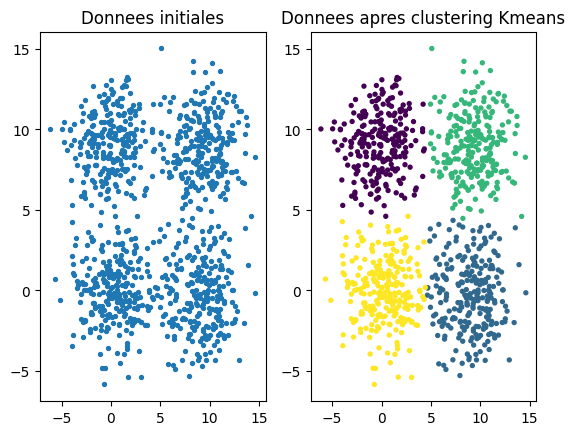

nb clusters = 4 , nb iter = 4 , runtime =  109.55 ms


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/si

Nombre de clusters = 2
Score de silhouette: 0.4170440376073085
Score de Davies-Bouldin: 1.0904032887888042
-------------------------------
Nombre de clusters = 3
Score de silhouette: 0.4412071257600454
Score de Davies-Bouldin: 0.7879127773201254
-------------------------------
Nombre de clusters = 4
Score de silhouette: 0.5578781303092035
Score de Davies-Bouldin: 0.5691317958541301
-------------------------------
Nombre de clusters = 5
Score de silhouette: 0.4878100000031191
Score de Davies-Bouldin: 0.8061096380968559
-------------------------------
Nombre de clusters = 6
Score de silhouette: 0.42034891970578037
Score de Davies-Bouldin: 0.9451142733748327
-------------------------------


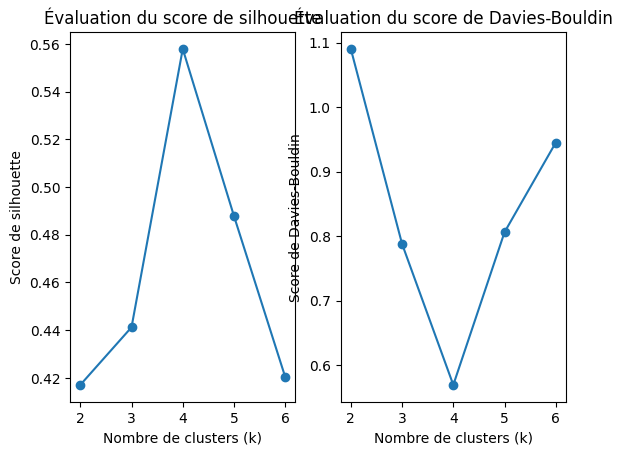

In [57]:
# Troisième exemple

databrut = arff.loadarff(open(path+"square2.arff", "r"))

datanp = [[x[0],x[1]] for x in databrut[0]]

f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

plt.subplot(1,2,1)
plt.scatter(f0 , f1 , s=8)
plt.title("Donnees initiales")


print("Appel KMeans pour une valeur fixee de k ")
tps1 = time.time()

k=4
model = cluster.KMeans(n_clusters=k, init='k-means++')

model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.subplot(1,2,2)
plt.scatter(f0 , f1 , c=labels , s=8)
plt.title("Donnees apres clustering Kmeans")
plt.show()
print("nb clusters =",k,", nb iter =",iteration , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")


from sklearn import metrics

# Liste des valeurs de k à évaluer
k_values = [2, 3, 4, 5, 6]

# Initialisation des listes pour stocker les métriques d'évaluation
silhouette_scores = []
davies_bouldin_scores = []

# Boucle sur les différentes valeurs de k
for k in k_values:
    model = cluster.KMeans(n_clusters=k, init='k-means++')
    model.fit(datanp)
    labels = model.labels_
    
    silhouette = metrics.silhouette_score(datanp, labels)
    davies_bouldin = metrics.davies_bouldin_score(datanp, labels)
    
    # Ajout des métriques à la liste correspondante
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

# Affichage des métriques pour chaque valeur de k
for i, k in enumerate(k_values):
    print("Nombre de clusters =", k)
    print("Score de silhouette:", silhouette_scores[i])
    print("Score de Davies-Bouldin:", davies_bouldin_scores[i])
    print("-------------------------------")

# Tracé des métriques pour chaque valeur de k
plt.subplot(1,2,1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de silhouette")
plt.title("Évaluation du score de silhouette")

plt.subplot(1,2,2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de Davies-Bouldin")
plt.title("Évaluation du score de Davies-Bouldin")

plt.show()

# Recherchez le score de silhouette le plus élevé. Une valeur proche de 1 indique que les échantillons sont bien regroupés, 
# tandis qu'une valeur proche de -1 indique des clusters incorrects. Choisissez le k correspondant au score de silhouette le plus élevé.

# Recherchez le score de Davies-Bouldin le plus faible. Une valeur proche de zéro indique des clusters bien séparés. 
# Choisissez le k correspondant au score de Davies-Bouldin le plus bas.


# Arrivez-vous à retrouver le résultat attendu à l'aide de ces métriques d'évaluation ?

# Plus ou moins

Appel KMeans pour une valeur fixee de k 


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


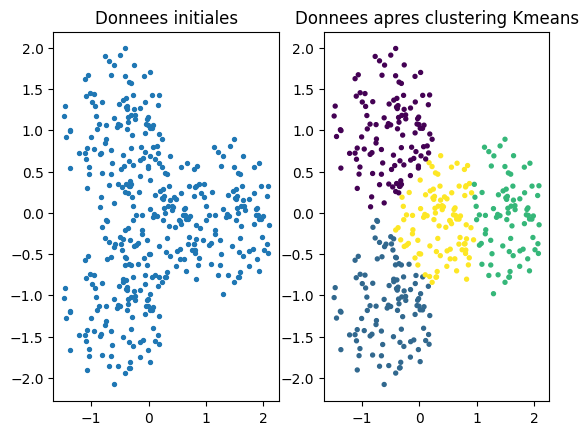

nb clusters = 4 , nb iter = 6 , runtime =  130.2 ms


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/si

Nombre de clusters = 2
Score de silhouette: 0.36456299319329555
Score de Davies-Bouldin: 0.9981113449611657
-------------------------------
Nombre de clusters = 3
Score de silhouette: 0.49747648143912815
Score de Davies-Bouldin: 0.6838206168452641
-------------------------------
Nombre de clusters = 4
Score de silhouette: 0.41817556228746205
Score de Davies-Bouldin: 0.7971587692042214
-------------------------------
Nombre de clusters = 5
Score de silhouette: 0.3869373069101968
Score de Davies-Bouldin: 0.8570376572423216
-------------------------------
Nombre de clusters = 6
Score de silhouette: 0.348639029814054
Score de Davies-Bouldin: 1.0009530734817063
-------------------------------


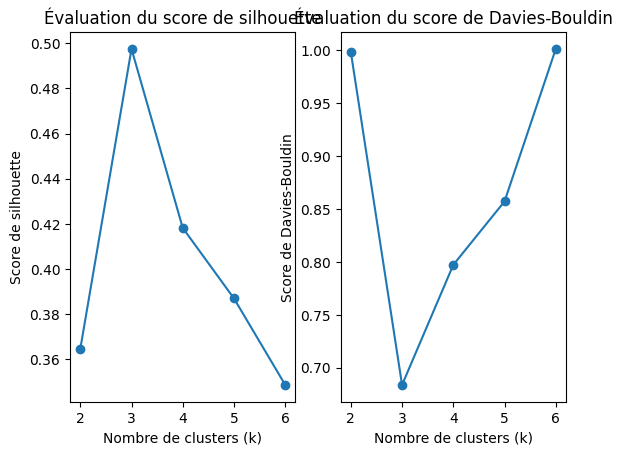

Appel KMeans pour une valeur fixee de k 


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


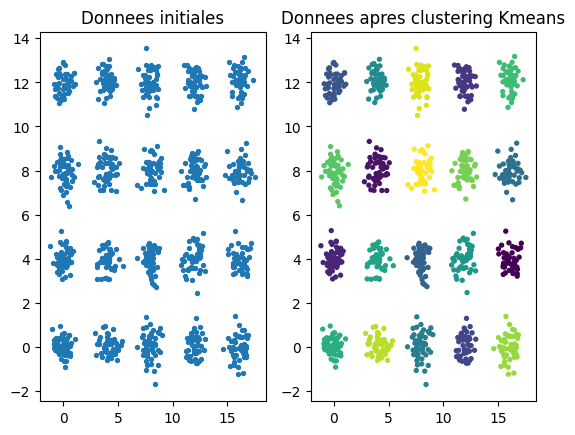

nb clusters = 20 , nb iter = 3 , runtime =  85.72 ms


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/si

Nombre de clusters = 12
Score de silhouette: 0.496585954667314
Score de Davies-Bouldin: 0.766002940202063
-------------------------------
Nombre de clusters = 13
Score de silhouette: 0.515366237034809
Score de Davies-Bouldin: 0.6999678617821019
-------------------------------
Nombre de clusters = 14
Score de silhouette: 0.5592400058430128
Score de Davies-Bouldin: 0.6608152191766118
-------------------------------
Nombre de clusters = 15
Score de silhouette: 0.5779827443177499
Score de Davies-Bouldin: 0.6150110024443535
-------------------------------
Nombre de clusters = 16
Score de silhouette: 0.5983557279385736
Score de Davies-Bouldin: 0.549732336023975
-------------------------------
Nombre de clusters = 17
Score de silhouette: 0.6283572153535419
Score de Davies-Bouldin: 0.5214729029635029
-------------------------------
Nombre de clusters = 18
Score de silhouette: 0.673280516976182
Score de Davies-Bouldin: 0.4677399643863047
-------------------------------
Nombre de clusters = 19
S

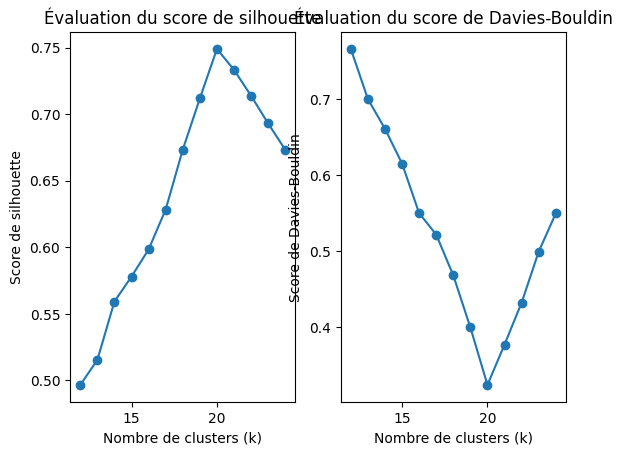

Appel KMeans pour une valeur fixee de k 


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


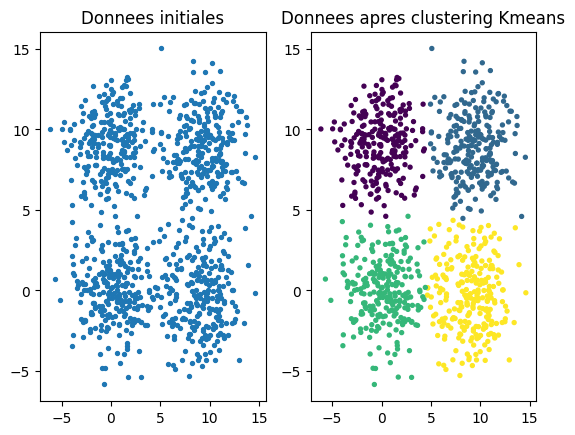

nb clusters = 4 , nb iter = 5 , runtime =  31.89 ms


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bradfo/.local/lib/python3.8/si

Nombre de clusters = 2
Score de silhouette: 0.4170440376073085
Score de Davies-Bouldin: 1.0904032887888042
-------------------------------
Nombre de clusters = 3
Score de silhouette: 0.4609692936414035
Score de Davies-Bouldin: 0.7334354690992937
-------------------------------
Nombre de clusters = 4
Score de silhouette: 0.5578781303092035
Score de Davies-Bouldin: 0.5691317958541301
-------------------------------
Nombre de clusters = 5
Score de silhouette: 0.4822750983224539
Score de Davies-Bouldin: 0.7660068507873852
-------------------------------
Nombre de clusters = 6
Score de silhouette: 0.4137205753327667
Score de Davies-Bouldin: 0.9326918629368044
-------------------------------


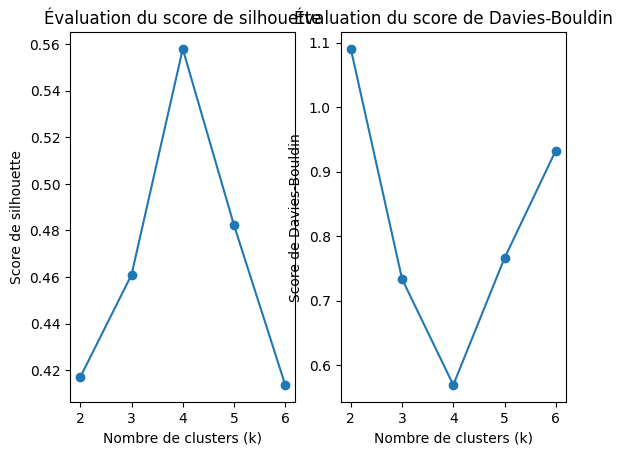

In [58]:
###################################################################
# VERSION FACTORISEE
###################################################################


from sklearn import metrics
# Choisissez quelques jeux de données pour lesquels il vous semble que la méthode k-means devrait identifier correctement les clusters


dict = {"tetra.arff":[4,[2, 3, 4, 5, 6]], "twenty.arff":[20,[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]], "square2.arff":[4,[2, 3, 4, 5, 6]]}

i = 0
for key in dict:
    databrut = arff.loadarff(open(path+key, "r"))

    datanp = [[x[0],x[1]] for x in databrut[0]]

    f0 = [x[0] for x in datanp]
    f1 = [x[1] for x in datanp]

    plt.subplot(1,2,1)
    plt.scatter(f0 , f1 , s=8)
    plt.title("Donnees initiales")
    print("Appel KMeans pour une valeur fixee de k ")
    tps1 = time.time()
    k=dict[key][0]
    model = cluster.KMeans(n_clusters=k, init='k-means++')

    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    plt.subplot(1,2,2)
    plt.scatter(f0 , f1 , c=labels , s=8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    # Mesurez le temps de calcul
    print("nb clusters =",k,", nb iter =",iteration , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")

    # Liste des valeurs de k à évaluer
    k_values = dict[key][1]

    # Initialisation des listes pour stocker les métriques d'évaluation
    silhouette_scores = []
    davies_bouldin_scores = []

    # Boucle sur les différentes valeurs de k
    for k in k_values:
        model = cluster.KMeans(n_clusters=k, init='k-means++')
        model.fit(datanp)
        labels = model.labels_
        
        silhouette = metrics.silhouette_score(datanp, labels)
        davies_bouldin = metrics.davies_bouldin_score(datanp, labels)
        
        # Ajout des métriques à la liste correspondante
        silhouette_scores.append(silhouette)
        davies_bouldin_scores.append(davies_bouldin)

    # Affichage des métriques pour chaque valeur de k
    for i, k in enumerate(k_values):
        print("Nombre de clusters =", k)
        print("Score de silhouette:", silhouette_scores[i])
        print("Score de Davies-Bouldin:", davies_bouldin_scores[i])
        print("-------------------------------")

    # Tracé des métriques pour chaque valeur de k
    plt.subplot(1,2,1)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Score de silhouette")
    plt.title("Évaluation du score de silhouette")

    plt.subplot(1,2,2)
    plt.plot(k_values, davies_bouldin_scores, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Score de Davies-Bouldin")
    plt.title("Évaluation du score de Davies-Bouldin")

    plt.show()
    # Recherchez le score de silhouette le plus élevé. Une valeur proche de 1 indique que les échantillons sont bien regroupés, 
    # tandis qu'une valeur proche de -1 indique des clusters incorrects. Choisissez le k correspondant au score de silhouette le plus élevé.

    # Recherchez le score de Davies-Bouldin le plus faible. Une valeur proche de zéro indique des clusters bien séparés. 
    # Choisissez le k correspondant au score de Davies-Bouldin le plus bas.


# Arrivez-vous à retrouver le résultat attendu à l'aide de ces métriques d'évaluation ?

# Plus ou moins

### 2.3. Limites de la méthode k-Means

Choissiez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode k-Means aura des difficultés pour identifier correctement les clusters.

Aplliquez la méthode k-Means (en faisant varier la valeur de k) sur ces jeux de données pour confirmer vos choix.

Appel KMeans pour une valeur fixee de k 


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


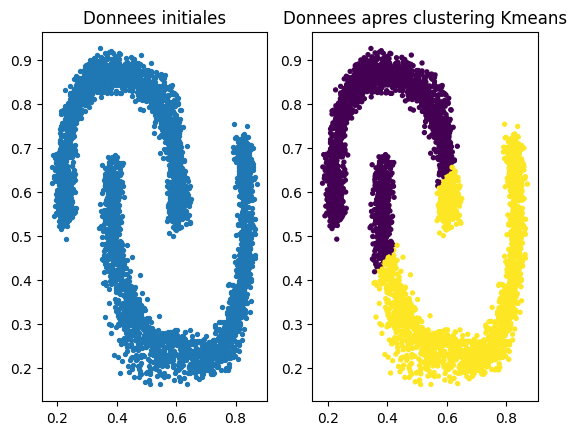

nb clusters = 2 , nb iter = 5 , runtime =  1125.22 ms


/home/bradfo/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:

from sklearn import metrics
# Choisissez quelques jeux de données pour lesquels il vous semble que la méthode k-means devrait identifier correctement les clusters


dict = {"banana.arff":[2,[2, 3, 4, 5]], "flame.arff":[3,[2, 3, 4, 5, 6, 7]], "smile1.arff":[2,[2, 3, 4, 5, 6]]}

i = 0
for key in dict:
    databrut = arff.loadarff(open(path+key, "r"))

    datanp = [[x[0],x[1]] for x in databrut[0]]

    f0 = [x[0] for x in datanp]
    f1 = [x[1] for x in datanp]

    plt.subplot(1,2,1)
    plt.scatter(f0 , f1 , s=8)
    plt.title("Donnees initiales")
    print("Appel KMeans pour une valeur fixee de k ")
    tps1 = time.time()
    k=dict[key][0]
    model = cluster.KMeans(n_clusters=k, init='k-means++')

    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    plt.subplot(1,2,2)
    plt.scatter(f0 , f1 , c=labels , s=8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    # Mesurez le temps de calcul
    print("nb clusters =",k,", nb iter =",iteration , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")

    # Liste des valeurs de k à évaluer
    k_values = dict[key][1]

    # Initialisation des listes pour stocker les métriques d'évaluation
    silhouette_scores = []
    davies_bouldin_scores = []

    # Boucle sur les différentes valeurs de k
    for k in k_values:
        model = cluster.KMeans(n_clusters=k, init='k-means++')
        model.fit(datanp)
        labels = model.labels_
        
        silhouette = metrics.silhouette_score(datanp, labels)
        davies_bouldin = metrics.davies_bouldin_score(datanp, labels)
        
        # Ajout des métriques à la liste correspondante
        silhouette_scores.append(silhouette)
        davies_bouldin_scores.append(davies_bouldin)

    # Affichage des métriques pour chaque valeur de k
    for i, k in enumerate(k_values):
        print("Nombre de clusters =", k)
        print("Score de silhouette:", silhouette_scores[i])
        print("Score de Davies-Bouldin:", davies_bouldin_scores[i])
        print("-------------------------------")

    # Tracé des métriques pour chaque valeur de k
    plt.subplot(1,2,1)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Score de silhouette")
    plt.title("Évaluation du score de silhouette")

    plt.subplot(1,2,2)
    plt.plot(k_values, davies_bouldin_scores, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Score de Davies-Bouldin")
    plt.title("Évaluation du score de Davies-Bouldin")

    plt.show()
    # Recherchez le score de silhouette le plus élevé. Une valeur proche de 1 indique que les échantillons sont bien regroupés, 
    # tandis qu'une valeur proche de -1 indique des clusters incorrects. Choisissez le k correspondant au score de silhouette le plus élevé.

    # Recherchez le score de Davies-Bouldin le plus faible. Une valeur proche de zéro indique des clusters bien séparés. 
    # Choisissez le k correspondant au score de Davies-Bouldin le plus bas.


# Arrivez-vous à retrouver le résultat attendu à l'aide de ces métriques d'évaluation ?

# Plus ou moins

### 2.4. Méthodes k-medoids

Plusieurs méthodes de clustering k-medoids sont disponibles en récupérant le package kmedoids. Le site https://python-kmedoids.readthedocs.io/ fournit une documentation de ces méthodes. Un exemple d'utilisation (pour une valeur fixée de k et pour une métrique de distance donnée) est fourni ci-dessous

In [ ]:
from sklearn import metrics
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances

path = "./artificial/"

databrut = arff.loadarff(open(path+"xclara.arff", "r"))
datanp = [[x[0],x[1]] for x in databrut[0]]

tps1 = time.time()
k=3
distmatrix = euclidean_distances(datanp)
fp = kmedoids.fasterpam(distmatrix , k)
tps2 = time.time()
iter_kmed = fp.n_iter
labels_kmed = fp.labels
print("Loss with FasterPAM: ", fp.loss)

plt.scatter(f0 , f1 , c=labels_kmed , s=8)
plt.title("Donnees apres clustering Kmedoids")
plt.show()
print("nb clusters =",k,", nb iter =",iter_kmed , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")

- Appliquez itérativement la méthode précédente pour déterminer le bon nombre de clusters à l'aide de métriques d'évaluation (en conservant la distance euclidienne)
- Mesurez le temps de calcul
- Arrivez-vous à retrouver le résultat attendu à l'aide de métriques d'évluation fournies dans le package kmedoids ?
- Pour la valeur de k identifiée comme la plus pertinente, comparez les résultats obtenus par le clustering k-means et par le clustering k-medoids à l'aide d'indicateurs comme rand_score ou mutual_information.

Avec la méthode des k-medoids, en plus du nombre de clusters, on peut également faire varier la métrique de distance.

- Testez l'impact de la métrique de distance sur quelques exemples.

In [ ]:
# Appliquez itérativement 